In [4]:
import torch 
from torchvision import datasets, transforms
import helper

#Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

#Download the training data 
trainset = datasets.FashionMNIST('~/pytorch/F_MNIST_data/', download = True, train = True, transform=transform)
trainLoader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle= True )

testset = datasets.FashionMNIST('~/pytorch/F_MNIST_data/', download = True, train = False, transform=transform)
testLoader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle= True )

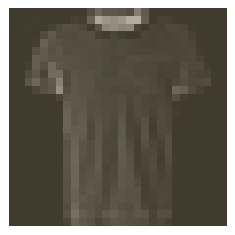

In [5]:
image, label = next(iter(trainLoader))
helper.imshow(image[0,:]);


In [15]:
from torch import nn, optim
import torch.nn.functional as F

# TODO: Define your network architecture here
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        #Defining the layers 128, 64, 10
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        #output layer
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        
        #make sure input tensor is flattened
        x = x.view(x.shape[0], -1) #forgot to add this line
        #hidden layer with relu
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)

        #output layer with softmax activation
        x = F.log_softmax(x, dim = 1)
        
        return x

model

Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [16]:
# create the network, define the criterion and optimizer
model = Classifier()
# Define the loss
criterion = nn.NLLLoss()

#optimiziers require the parameters to optimize and a learning rate
optimizer = optim.Adam(model.parameters(), lr = 0.003)


In [17]:
# traing the network
epochs = 5
for e in range(epochs):
    running_loss = 0
    for image, label in trainLoader:
        log_ps = model(image)
        loss = criterion(log_ps, label)
    
        #Training pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss}")

Training loss: 486.33229634165764
Training loss: 370.11071845144033
Training loss: 335.6826172173023
Training loss: 314.0726308003068
Training loss: 297.4025517180562


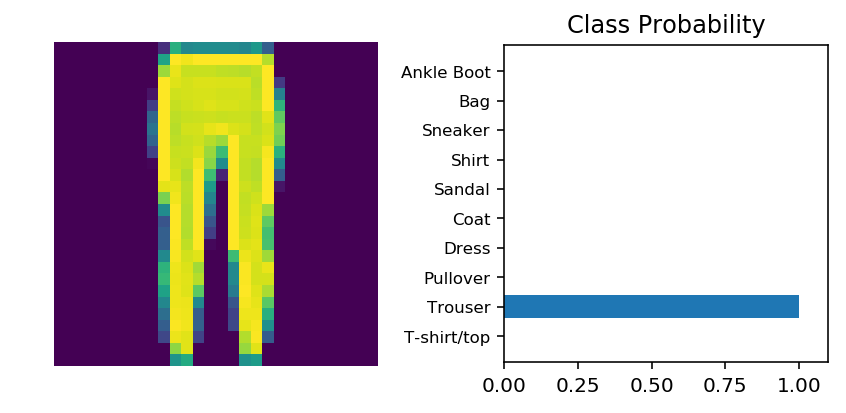

In [18]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

#test out your network!
dataiter = iter(testLoader)
images, labels = dataiter.next()
img = images[1]

#calculate the class probabilities(softmax) for img
ps = torch.exp(model(img))

#plot the img and probabilities
helper.view_classify(img, ps, version ="Fashion")